In [1]:
# Para visualización en notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Parámetros de visualización
sns.set_context('talk')
mpl.rcParams['figure.figsize'] = (8, 6)


import os
from collections import Counter

# Números y Datos
import numpy as np
import pandas as pd

import networkx as nx
from networkx.algorithms.approximation import average_clustering

from glob import glob
from pathlib import Path

In [6]:
import urllib.request

url = "https://www.dropbox.com/scl/fi/nk8yvhez5ylhd6blzf77o/airport.txt?rlkey=3cf24r6yij8uu0fakb68yztlm&dl=1"
urllib.request.urlretrieve(url, "airport.txt")
print("Descarga completa: airport.txt")

url = "https://www.dropbox.com/scl/fi/t62q9swnah7nvu34falkj/celegans.txt?rlkey=lxg2kashijntfi0bwmeuty5ja&dl=1"
urllib.request.urlretrieve(url, "celegans.txt")
print("Descarga completa: celegans.txt")

url = "https://www.dropbox.com/scl/fi/eebzjgqazi8b02bkkrxmf/airStrongly_positions.pkl?rlkey=cyhifzsgrls5vdlycrb1gnykv&st=6lozmqe6&dl=1"
urllib.request.urlretrieve(url, "airportStronglyConn_pos.pkl")
print("Descarga completa: airportStronglyConn_pos.pkl")


Descarga completa: airport.txt
Descarga completa: celegans.txt
Descarga completa: airportStronglyConn_pos.pkl


In [2]:
# DATOS REDES:
#!wget -O airport.txt https://www.dropbox.com/scl/fi/nk8yvhez5ylhd6blzf77o/airport.txt?rlkey=3cf24r6yij8uu0fakb68yztlm&dl=1
#!wget -O facebook.txt https://www.dropbox.com/scl/fi/hdgcmyss47w9t676kh2ug/facebook.txt?rlkey=j616y86ejfn6f719jg4b8e413&dl=1
#!wget -O lesmiserables.txt https://www.dropbox.com/scl/fi/ex7183k4zjgxbiw0diwi3/lesmiserables.txt?rlkey=zx5u5371s7gw3jlv50363jycf&dl=1
#!wget -O terrorist.txt https://www.dropbox.com/scl/fi/2vl6hcazv5v13r7scodod/terrorist.txt?rlkey=l0n1rxbby6a8irtlyh1tbbweo&dl=1
#!wget -O celegans.txt https://www.dropbox.com/scl/fi/t62q9swnah7nvu34falkj/celegans.txt?rlkey=lxg2kashijntfi0bwmeuty5ja&dl=1
#!wget -O email.txt https://www.dropbox.com/scl/fi/w5o34b0olg7xek4s42lml/email-Eu-core.txt?rlkey=g2561imdd4ssyrwfgywrotzwm&st=czqgmef0&dl=1
#!wget -O email_labels.txt  https://www.dropbox.com/scl/fi/ij3b6jul7ispiovt18sfm/email-Eu-core-department-labels.txt?rlkey=dqp60qw20pw7biil9cvti4u68&st=zij9wsi8&dl=1


# AHORA ARCHIVOS DE POSICION DE LOS NODOS:
#!wget -O airportStronglyConn_pos.pkl https://www.dropbox.com/scl/fi/eebzjgqazi8b02bkkrxmf/airStrongly_positions.pkl?rlkey=cyhifzsgrls5vdlycrb1gnykv&st=6lozmqe6&dl=1
#!wget -O email_pos.pkl https://www.dropbox.com/scl/fi/loeuul6gxq7uscd1m7ks8/email_positions.pkl?rlkey=caf194s8198pffo2zaq6767jz&st=kw0c3tu4&dl=1
#!wget -O fb_pos.pkl https://www.dropbox.com/scl/fi/ka6v0h9ew5j08haxlbf6b/fb_positions.pkl?rlkey=7ul7jr7re5bziy54cgp3x9tre&st=vp6gjciw&dl=1

'wget' is not recognized as an internal or external command,
operable program or batch file.
'dl' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'dl' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'st' is not recognized as an internal or external command,
operable program or batch file.
'dl' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G


def read_graph_weighted(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_weighted_edges_from(array)
    return G

def read_dir_graph(filename):
    G = nx.DiGraph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

def read_dir_graph_weighted(filename):
    G = nx.DiGraph()
    array = np.loadtxt(filename, dtype=int)
    G.add_weighted_edges_from(array)
    return G

In [9]:
celegans= read_graph_weighted('celegans.txt')
print('C. elegans')
print(celegans)
print('Es dirigido?:',nx.is_directed(celegans))
print('Es pesado?:',nx.is_weighted(celegans))
print('Es conectado?:',nx.is_connected(celegans))
print('')

air = read_dir_graph_weighted('airport.txt')
print('Airport')
print(air)
print('Es dirigido?:',nx.is_directed(air))
print('Es pesado?:',nx.is_weighted(air))
print('Es fuertemente conexo?:',nx.is_strongly_connected(air))
print('Es debilmente conexo?:',nx.is_weakly_connected(air))


C. elegans
Graph with 297 nodes and 2148 edges
Es dirigido?: False
Es pesado?: True
Es conectado?: True

Airport
DiGraph with 1574 nodes and 28236 edges
Es dirigido?: True
Es pesado?: True
Es fuertemente conexo?: False
Es debilmente conexo?: False


In [10]:
# Definición de Funciones
'''
Permite obtener una Matriz de Adyacencia Pesada (MAP)
a partir de los datos contenidos en el archivo especificado
Substrae una matriz diagonal de 1s para evitar conexiones
reflexivas (un nodo consigo mismo)
'''
def obtener_map(nombre_archivo):
    df = pd.read_csv(nombre_archivo, header=None)
    matAdyacPesada = df.values
    n = matAdyacPesada.shape[0]
    matAdyacPesada -= np.diag(np.ones(n))
    return matAdyacPesada

'''
Crea un heatmap a partir de una matriz
'''
def graficar_heatmap(matriz, titulo=''):
    sns.heatmap(matriz)
    n = matriz.shape[0]
    plt.xlim(0, n)
    plt.ylim(0, n)
    plt.title(titulo)
    plt.show()

'''
Exporta un archivo de imagen
de un heatmap obtenido a partir de una matriz
'''
def exportar_heatmap(matriz, nombre_archivo='imagen_01.png'):
    sns.heatmap(matriz)
    n = matriz.shape[0]
    plt.xlim(0, n)
    plt.ylim(0, n)
    plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight')
    plt.close()

'''
Data una matriz de adyacencia pesada y un valor
de densidad de enlaces, calcula el valor umbral
necesario para representar valores que estén
por encima de la densidad de enlaces dada
'''
def densidad_a_umbral(matriz, densidad=0.1):
    n = matriz.shape[0]
    tril_idx = np.tril_indices(n, -1)
    c = sorted(np.array(list(matriz[tril_idx].reshape(-1))), reverse=True)
    return c[int((len(c)-1)*densidad)]

'''
Permite representar un grafo
'''
def representar_grafo(G, titulo='', zip_de_layout=None, mostrar_etiquetas=True, nombre_archivo=None):
    plt.figure(figsize=(8, 6))
    plt.title(titulo, fontsize=14)
    nx.draw(G, zip_de_layout, with_labels=mostrar_etiquetas, node_size=25, width=0.1, linewidths=0.25)
    if not nombre_archivo == None:
        plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight')
    plt.show()

'''
Permite representar un grafo a partir de una matriz
de Adyacencia - Agrega una escala de colores para los
nodos, que refleja el grado
Paletas disponibles: plt.cm.{Grays|Blues|BuGn|PuRd|Oranges}
'''
def representar_grafo_escala_colores(G, escala_color='grados', titulo='', zip_de_layout=None, mostrar_etiquetas=False, nombre_archivo=None):
    if escala_color == 'grados':
        valores_escala = dict(G.degree())
    elif escala_color == 'clustering':
        valores_escala = nx.clustering(G)
    nodos = G.nodes()
    n = len(list(nodos))
    n_color = np.asarray([valores_escala[n] for n in nodos])
    vmin = min(n_color)
    vmax = max(n_color)
    cmap = plt.cm.Oranges
    norm = plt.Normalize(vmin = vmin, vmax=vmax)
    plt.figure(figsize=(9,6))
    plt.title(titulo, fontsize=14)
    nx.draw(G, zip_de_layout, node_size=25, node_color=n_color, width=0.1, linewidths=0.25, vmin=vmin, vmax=vmax,cmap=cmap)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    plt.colorbar(sm, ax=plt.gca())
    if not nombre_archivo==None:
        plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight')
    plt.show()

'''
En Grafos dirigidos, permite obtener la mayor componente altamente conexa
'''
def obtener_mayor_componente_fuertemente_conexa(G):
    if nx.is_directed(G):
        StronglyCC = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
        return G.subgraph(StronglyCC[0])
    else:
        return None

'''
Calcula el diámetro del Grafo teniendo en cuenta:
    Si la red es no dirigida:
        Si la red es conexa, devuelve el diametro directo
        Si no es conexa devuelve el diámetro de la componente gigante
    Si la red es dirigida:
        Si está fuertemente conectada devuelve el diametro
        Si no está fuertemente conectada, devuelve el diámetro de la mayor componente fuertemente conectada
'''
def calcular_diametro(G):
    if not nx.is_directed(G):
        if nx.is_connected(G):
            print("La red no dirigida y conexa, obteniendo diámetro en forma directa")
            D = nx.diameter(G)
        else:
            print("La red es no dirigida y no es conexa. Retornando el diámetro de la componente gigante.")
            gigante = G.subgraph(max(nx.connected_components(G), key=len)).copy()
            D = nx.diameter(gigante)
    else:
        if nx.is_strongly_connected(G):
            print("La red es dirigida y fuertemente conexa, obteniendo diámetro en forma directa")
            D = nx.diameter(G)
        else:
            largest_scc = max(nx.strongly_connected_components(G), key=len)
            G_scc = G.subgraph(largest_scc).copy()
            print("La red es dirigida y no fuertemente conexa, obteniendo diámetro de la mayor componente fuertemente conexa")
            D = nx.diameter(G_scc)

    return D

'''
Para redes muy grandes, calcula la distancia media por sampleo
tomando n pares de nodos, calculando entre ellos la distancia más
corta y luego promediando.
Utilizo el decorator @retry porque en ciertos ejemplos, uno o más pares de nodos
elegidos pueden no estar conectados y luego su camino no está definido, arrojando
una excepción. Retry me permite avanzar desestimando el error
'''
def calcular_distancia_media_y_eff_por_sampleo(G, numero_muestras=100):

    nodos = list(G)
    if numero_muestras > len(nodos):
        numero_muestras = len(nodos)

    if numero_muestras > 100000:
        numero_muestras = 100000

    pares = np.random.choice(nodos, (numero_muestras, 2))
    distancias = [nx.shortest_path_length(G, *par)
               for par in pares]
    inversas = [(1/nx.shortest_path_length(G, *par))
               for par in pares]
    return np.mean(distancias), np.mean(inversas)


'''
Devuelve el grado promedio y el nodo con mayor grado
'''
def calcular_grados(matriz, densidad=0.1):
    G = nx.from_numpy_array(matriz)
    if nx.is_weighted(G):
        umbral = densidad_a_umbral(matriz, densidad)
        G = nx.from_numpy_array(matriz >= umbral)
    else:
        G = nx.from_numpy_array(matriz)
    grados = [G.degree(n) for n in G.nodes()]
    promedio = np.mean(grados)
    nodo_max = max(G.degree(), key=lambda x: x[1])
    return promedio, nodo_max

'''
Analiza y reporta varios parametros de los grafos
'''
def analizar_grafo(G):

    print('Es un grafo dirigido?:',nx.is_directed(G))
    print('Es un grafo pesado?:',nx.is_weighted(G))
    if not nx.is_directed(G):
        print('Es un grafo conectado?:',nx.is_connected(G))
    else:
        print('Grafo dirigido no acepta definición de conexo')

    diametro = calcular_diametro(G)
    print(f"Diámetro: {diametro}")

    if nx.is_directed(G):
        print('Es un grafo fuertemente conexo?:',nx.is_strongly_connected(G))
        print('Es un grafo debilmente conexo?:',nx.is_weakly_connected(G))
        componente_mayor_fuertemente_conexa = obtener_mayor_componente_fuertemente_conexa(G)
        print("Componente mayor fuertemente conexa")
        print(componente_mayor_fuertemente_conexa)
    else:
        print("Por no ser dirigido no acepta determinación de fuertemente o débilmente conexo")


    # Por si es dirigido tenemos que hacer esto
    # Cálculo de distancia media
    if nx.is_directed(G):
        H = G.to_undirected()
        print("El grafo no es conexo, calculando la distancia media y la eficiencia de la componente gigante")
        print("Esta es una lista de las componentes conexas y su distancia media")
        for componente_nodos in nx.connected_components(H):
            subgrafo = H.subgraph(componente_nodos)
            n = subgrafo.number_of_nodes()
            if nx.is_connected(subgrafo) and n > 1:
                L = nx.average_shortest_path_length(subgrafo)
                print(f"- Componente de {n} nodos con distancia media: {L:.3f}")
            #elif n == 1:
            #    print(f"- Componente aislada de 1 nodo (sin distancia definida)")

        gigante = H.subgraph(max(nx.connected_components(H), key=len)).copy()
        distancia_media_directa = nx.average_shortest_path_length(gigante)
        nodos_gigante = gigante.number_of_nodes()
        print(f"La componente Gigante tiene {nodos_gigante} nodos")
        eficiencia_directa = nx.global_efficiency(gigante)
        distancia_media_sampleo, eficiencia_sampleo = calcular_distancia_media_y_eff_por_sampleo(gigante)
        print(f"Distancia Media  de la Componente Gigante obtenida por muestreo: {distancia_media_sampleo}")
        print(f"Distancia Media Directa de la Componente Gigante: {distancia_media_directa}")
        print(f"Eficiencia Global de la Componente Gigante obtenida por muestreo: {eficiencia_sampleo}")
        print(f"Eficiencia Global Directa de la Componente Gigante: {eficiencia_directa}")
        eficiencia_directa = nx.global_efficiency(H)
        print(f"Eficiencia Global Directa del Grafo: {eficiencia_directa}")


    elif nx.is_connected(G):
        distancia_media_directa = nx.average_shortest_path_length(G)
        distancia_media_sampleo, eficiencia_sampleo = calcular_distancia_media_y_eff_por_sampleo(G)
        print(f"Distancia Media del Grafo obtenida por muestreo: {distancia_media_sampleo}")
        print(f"Distancia Media Diecta del Grafo: {distancia_media_directa}")
        print(f"Eficiencia Global Del Grafo obtenida por muestreo: {eficiencia_sampleo}")
        eficiencia_directa = nx.global_efficiency(G)
        print(f"Eficiencia Global Directa del Grafo: {eficiencia_directa}")
    else:
        print("El grafo no es conexo, calculando la distancia media y la eficiencia de la componente gigante")
        print("Esta es una lista de las componentes conexas y su distancia media")
        for componente_nodos in nx.connected_components(G):
            subgrafo = G.subgraph(componente_nodos)
            n = subgrafo.number_of_nodes()
            if nx.is_connected(subgrafo) and n > 1:
                L = nx.average_shortest_path_length(subgrafo)
                print(f"- Componente de {n} nodos con distancia media: {L:.3f}")
            #elif n == 1:
            #    print(f"- Componente aislada de 1 nodo (sin distancia definida)")

        gigante = G.subgraph(max(nx.connected_components(G), key=len)).copy()
        distancia_media_directa = nx.average_shortest_path_length(gigante)
        nodos_gigante = gigante.number_of_nodes()
        print(f"La componente Gigante tiene {nodos_gigante} nodos")
        eficiencia_directa = nx.global_efficiency(gigante)
        distancia_media_sampleo, eficiencia_sampleo = calcular_distancia_media_y_eff_por_sampleo(gigante)
        print(f"Distancia Media  de la Componente Gigante obtenida por muestreo: {distancia_media_sampleo}")
        print(f"Distancia Media Directa de la Componente Gigante: {distancia_media_directa}")
        print(f"Eficiencia Global de la Componente Gigante obtenida por muestreo: {eficiencia_sampleo}")
        print(f"Eficiencia Global Directa de la Componente Gigante: {eficiencia_directa}")
        eficiencia_directa = nx.global_efficiency(G)
        print(f"Eficiencia Global Directa del Grafo: {eficiencia_directa}")



def graficar_distribucion_grados(G, bins=10, titulo='Distribución de Grados', nombre_archivo=None):
    plt.figure(figsize=(6, 4))
    grados = [G.degree(n) for n in G.nodes()]
    hist, bins, _ = plt.hist(grados, bins=bins, density=True)
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.title(titulo)
    if not nombre_archivo == None:
        plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight')
    plt.show()

def graficar_distribucion_grados_normalizada(G, bins=10, titulo='Distribución de Grado Normalizada', nombre_archivo=None):
    grados = [G.degree(n) for n in G.nodes()]
    conteo = Counter(grados)
    total_nodos = G.number_of_nodes()

    # Crear distribución normalizada
    grados_k = sorted(conteo.keys())
    pk = [conteo[k] / total_nodos for k in grados_k]

    # Graficar
    plt.figure(figsize=(6, 4))
    plt.bar(grados_k, pk, width=0.8, color='skyblue', edgecolor='black')
    #plt.hist(grados_k, bins=bins, density=True)
    plt.xlabel('Grado k')
    plt.ylabel('p(k)')
    plt.title(titulo)

    if nombre_archivo:
        plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight')

    plt.show()

def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

def read_graph_weighted(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_weighted_edges_from(array)
    return G

def read_dir_graph(filename):
    G = nx.DiGraph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

def read_dir_graph_weighted(filename):
    G = nx.DiGraph()
    array = np.loadtxt(filename, dtype=int)
    G.add_weighted_edges_from(array)
    return G

In [11]:
print("=== C. elegans ===")
G_ce = read_graph_weighted('celegans.txt')
print(G_ce)
analizar_grafo(G_ce)



=== C. elegans ===
Graph with 297 nodes and 2148 edges
Es un grafo dirigido?: False
Es un grafo pesado?: True
Es un grafo conectado?: True
La red no dirigida y conexa, obteniendo diámetro en forma directa
Diámetro: 5
Por no ser dirigido no acepta determinación de fuertemente o débilmente conexo
Distancia Media del Grafo obtenida por muestreo: 2.52
Distancia Media Diecta del Grafo: 2.455318955318955
Eficiencia Global Del Grafo obtenida por muestreo: 0.4341666666666668
Eficiencia Global Directa del Grafo: 0.4448228531562069


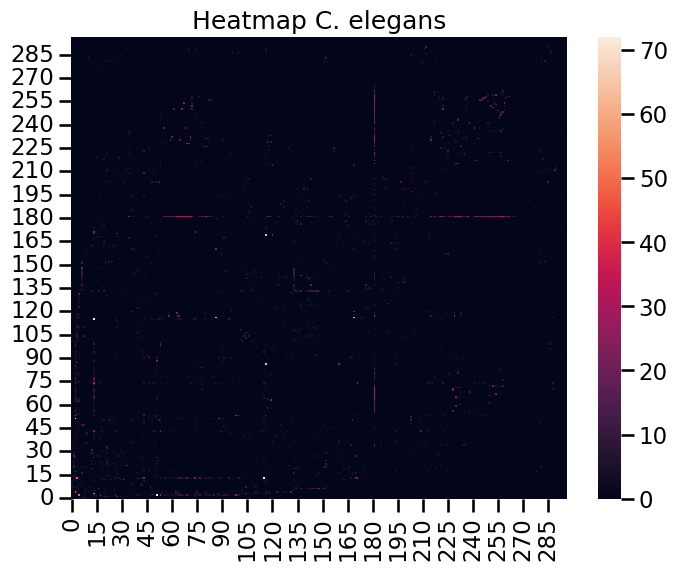

Umbral C. elegans (10% densidad): 0.0


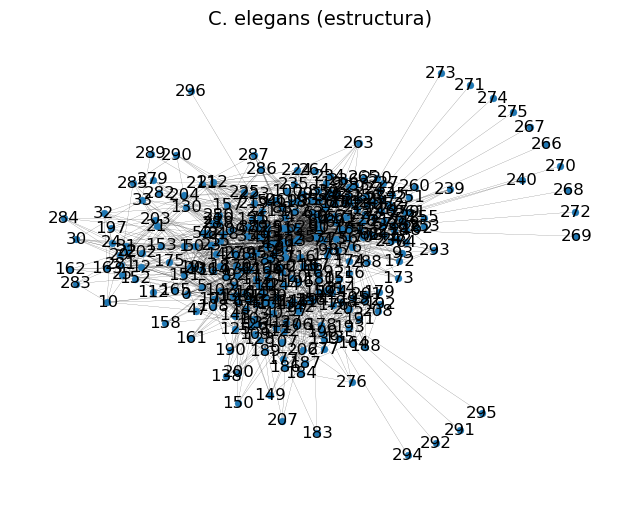

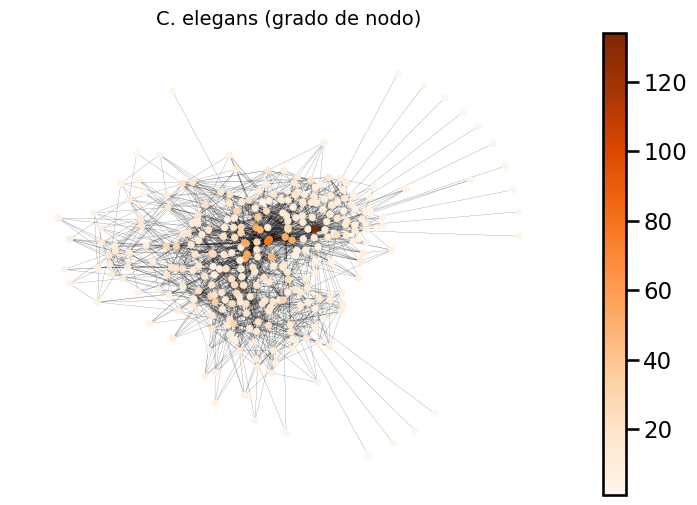

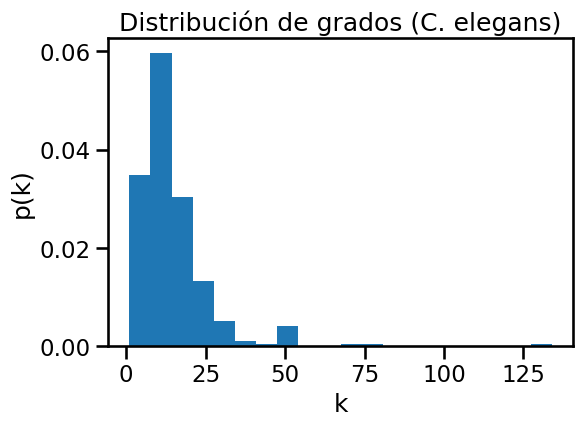

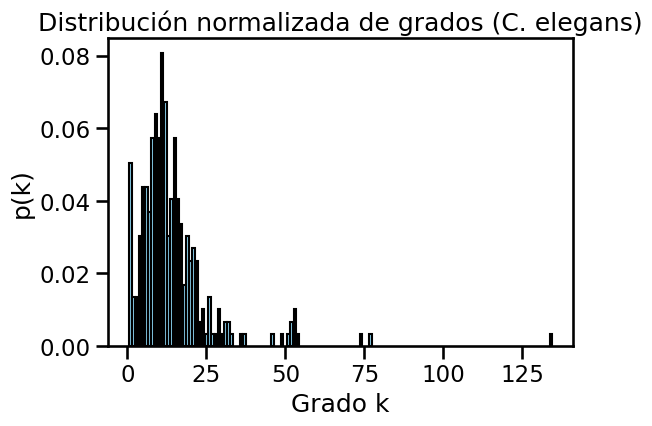

In [62]:
# Matriz de adyacencia pesada (reemplaza con tu archivo real si difiere)
mat_ce = nx.to_numpy_array(G_ce, weight='weight')
np.fill_diagonal(mat_ce, 0)

# Heatmap
mat_ce = nx.to_numpy_array(G_ce, weight='weight')
np.fill_diagonal(mat_ce, 0)

# Heatmap y export
graficar_heatmap(mat_ce, titulo='Heatmap C. elegans')
exportar_heatmap(mat_ce, nombre_archivo='heatmap_celegans.png')

# Umbral (10%)
umbral_ce = densidad_a_umbral(mat_ce, densidad=0.1)
print(f'Umbral C. elegans (10% densidad): {umbral_ce}')

# Layout y representación del grafo
pos_ce = nx.spring_layout(G_ce, seed=42)
representar_grafo(G_ce, titulo='C. elegans (estructura)', zip_de_layout=pos_ce)
representar_grafo_escala_colores(
    G_ce,
    escala_color='grados',
    titulo='C. elegans (grado de nodo)',
    zip_de_layout=pos_ce
)

# Distribución de grados
graficar_distribucion_grados(G_ce, bins=20, titulo='Distribución de grados (C. elegans)')
graficar_distribucion_grados_normalizada(
    G_ce, bins=20, titulo='Distribución normalizada de grados (C. elegans)'
)


In [13]:
# -------------------------------------------------
# Análisis para Airport
# -------------------------------------------------
print("\n=== Airport ===")
G_air = read_dir_graph_weighted('airport.txt')
print(G_air)
analizar_grafo(G_air)




=== Airport ===
DiGraph with 1574 nodes and 28236 edges
Es un grafo dirigido?: True
Es un grafo pesado?: True
Grafo dirigido no acepta definición de conexo
La red es dirigida y no fuertemente conexa, obteniendo diámetro de la mayor componente fuertemente conexa
Diámetro: 9
Es un grafo fuertemente conexo?: False
Es un grafo debilmente conexo?: False
Componente mayor fuertemente conexa
DiGraph with 1402 nodes and 28032 edges
El grafo no es conexo, calculando la distancia media y la eficiencia de la componente gigante
Esta es una lista de las componentes conexas y su distancia media
- Componente de 1572 nodos con distancia media: 3.115
- Componente de 2 nodos con distancia media: 1.000
La componente Gigante tiene 1572 nodos


ZeroDivisionError: division by zero

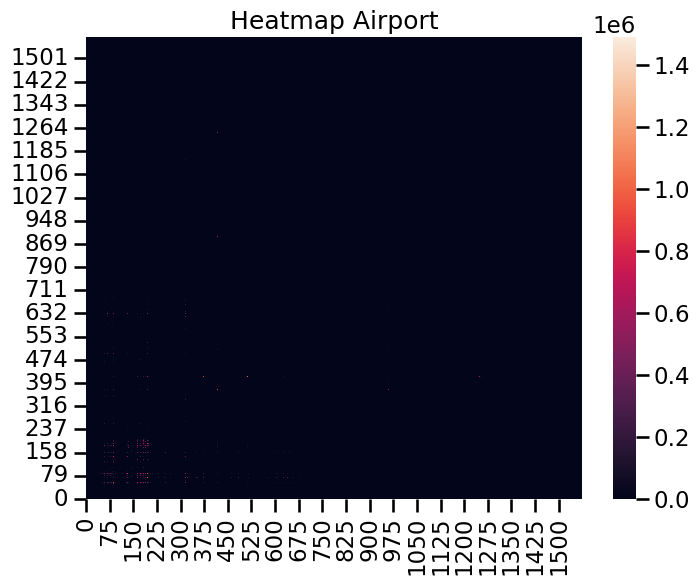

Umbral (10%): 0.0


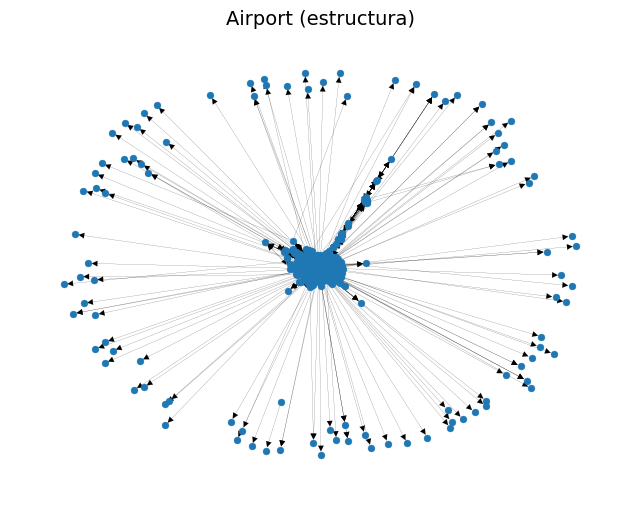

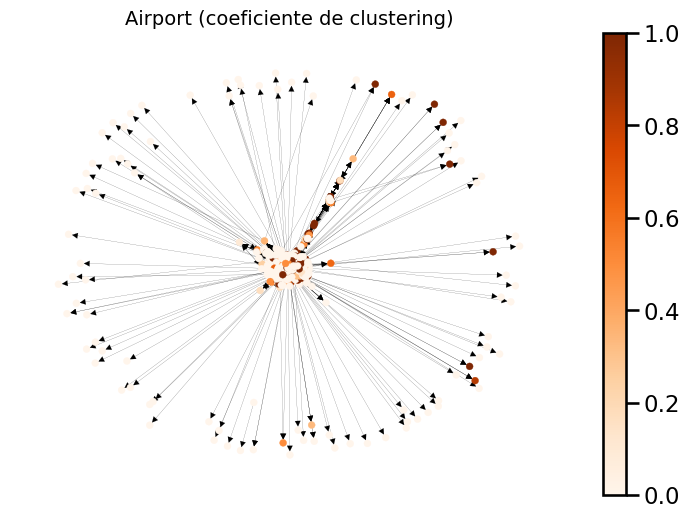

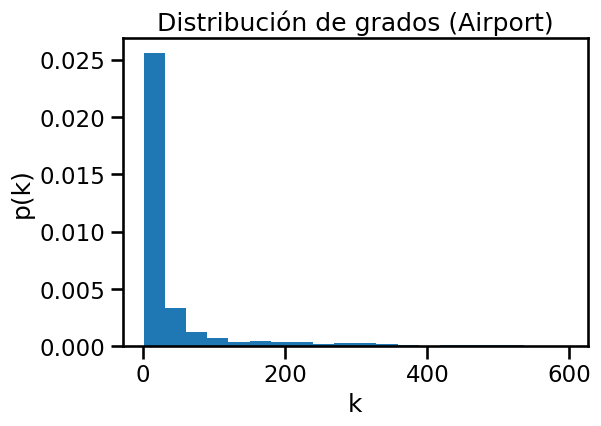

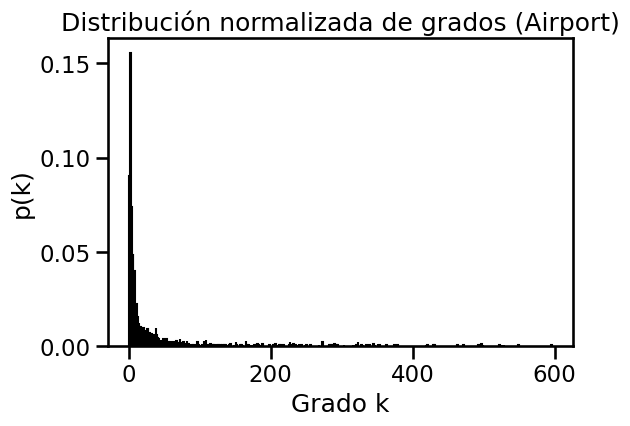

In [64]:
# Matriz de adyacencia pesada (reemplaza con tu archivo real si difiere)
#mat_air = obtener_map(G_air)

import networkx as nx
import numpy as np
import pandas as pd

# convierte G_air en un DataFrame N×N con los pesos
df_adj = nx.to_pandas_adjacency(G_air, dtype=float, weight='weight')
# fuerza ceros en la diagonal (quita self‐loops)
np.fill_diagonal(df_adj.values, 0)

# si quieres, guardas en CSV para reusar obtener_map:
df_adj.to_csv('airport_adj.csv', header=False, index=False)

# y ya:
mat_air = df_adj.values



# Heatmap
graficar_heatmap(mat_air, titulo='Heatmap Airport')
#exportar_heatmap(mat_air, nombre_archivo='heatmap_airport.png')

# Umbral para un 10% de densidad
umbral_air = densidad_a_umbral(mat_air, densidad=0.1)
print(f'Umbral (10%): {umbral_air}')

# Layout y representación del grafo
pos_air = nx.spring_layout(G_air, seed=42)
representar_grafo(G_air, titulo='Airport (estructura)', zip_de_layout=pos_air, mostrar_etiquetas=False)
representar_grafo_escala_colores(
    G_air,
    escala_color='clustering',
    titulo='Airport (coeficiente de clustering)',
    zip_de_layout=pos_air,
    mostrar_etiquetas=False
)

# Distribución de grados
graficar_distribucion_grados(G_air, bins=20, titulo='Distribución de grados (Airport)')
graficar_distribucion_grados_normalizada(
    G_air, bins=20, titulo='Distribución normalizada de grados (Airport)'
)

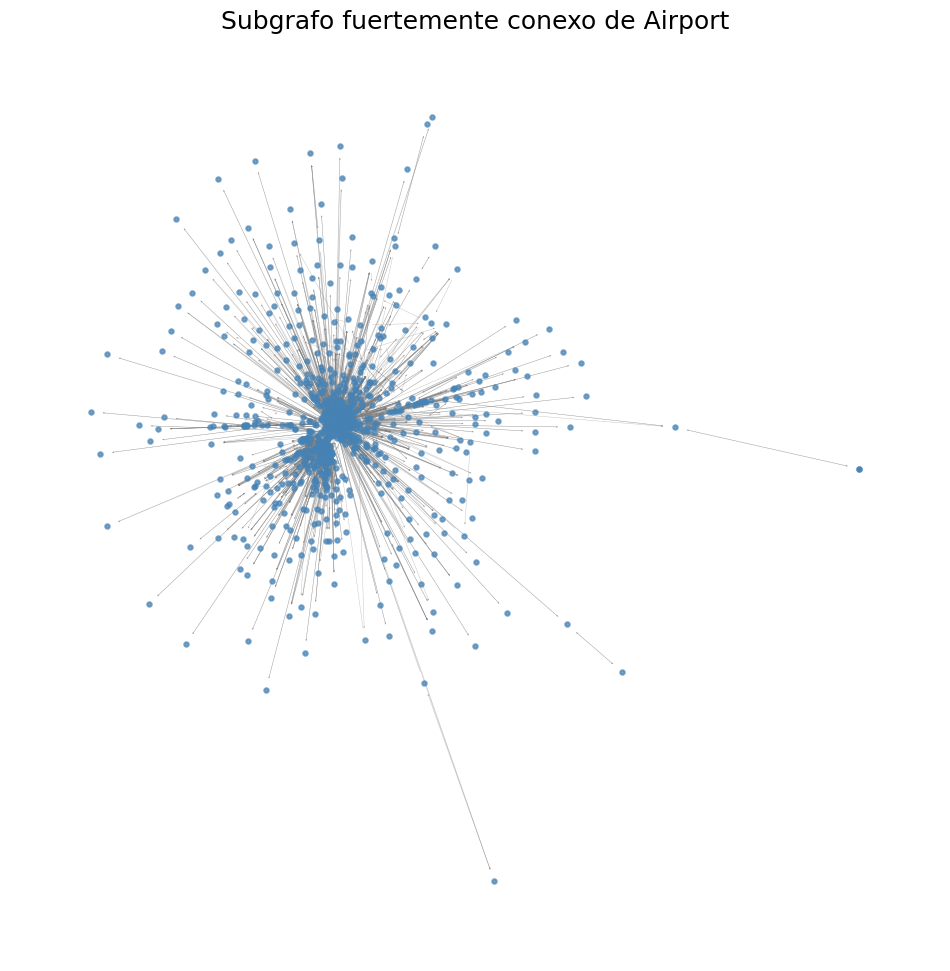

In [15]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx

# 1) Carga el grafo dirigido y ponderado
G_air = read_dir_graph_weighted('airport.txt')

# 2) Extrae la mayor componente fuertemente conexa (tu propia función)
H = obtener_mayor_componente_fuertemente_conexa(G_air)

# 3) Carga el dict de posiciones desde el .pkl
with open('airportStronglyConn_pos.pkl', 'rb') as f:
    pos = pickle.load(f)
# pos debe ser un dict { nodo: (x, y), ... }

# 4) Dibuja:
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(H, pos,
                       node_size=10,
                       node_color='steelblue',
                       alpha=0.7)
nx.draw_networkx_edges(H, pos,
                       edge_color='gray',
                       width=0.3,
                       arrowsize=2,
                       alpha=0.5)
plt.title("Subgrafo fuertemente conexo de Airport")
plt.axis('off')
plt.show()


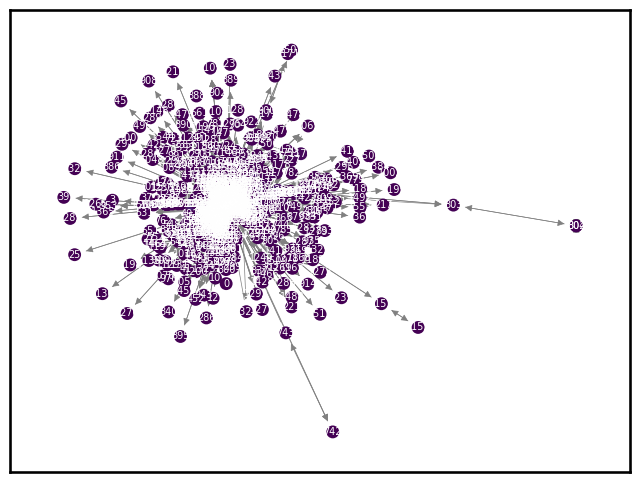

In [17]:
import numpy as np
import networkx as nx

def plotWeightedGraph(G, pos, colorMapping, magnification, nodeSize=45):
    # 1) nodos con color por mapping
    values = [ colorMapping.get(n, 0.0) for n in G.nodes() ]
    nx.draw_networkx_nodes(G, pos=pos,
                           node_size=nodeSize,
                           node_color=values)

    # 2) etiquetas (puedes quitar esta línea si sobra)
    nx.draw_networkx_labels(G, pos,
                            labels={n: n for n in G.nodes()},
                            font_size=7,
                            font_color='white')

    # 3) grosores de arista según peso
    #   obtenemos la lista de pesos en el mismo orden que G.edges()
    weights = [ G[u][v].get('weight', 1.0) for u, v in G.edges() ]
    edgeWidths = np.array(weights, dtype=float)

    if edgeWidths.max() > 0:
        edgeWidths = magnification * (edgeWidths / edgeWidths.max())
        # desplazamos mínimo a 0.5 para que se vean todas las aristas
        edgeWidths = edgeWidths - edgeWidths.min() + 0.5
    else:
        edgeWidths = np.full_like(edgeWidths, 0.5)

    nx.draw_networkx_edges(G, pos,
                           edgelist=G.edges(),
                           width=edgeWidths,
                           edge_color='gray')

# --- Ejemplo de uso ---

# 1) Carga el grafo completo
G_air = read_dir_graph_weighted('airport.txt')

# 2) Extrae la componente fuertemente conexa
H_air = obtener_mayor_componente_fuertemente_conexa(G_air)

# 3) Carga las posiciones de esa componente
with open('airportStronglyConn_pos.pkl','rb') as f:
    pos_air = pickle.load(f)

# 4) Centralidad de H_air, no de G_air
cent_air = nx.degree_centrality(H_air)

# 5) Dibuja solo H_air con pos_air
plotWeightedGraph(H_air, pos_air, cent_air,
                  magnification=10, nodeSize=60)



In [ ]:

# Para C. elegans:
G_ce = read_graph_weighted('celegans.txt')
pos_ce = nx.spring_layout(G_ce, seed=42)
cent_ce = nx.degree_centrality(G_ce)
plotWeightedGraph(G_ce, pos_ce, cent_ce, magnification=10, nodeSize=45)

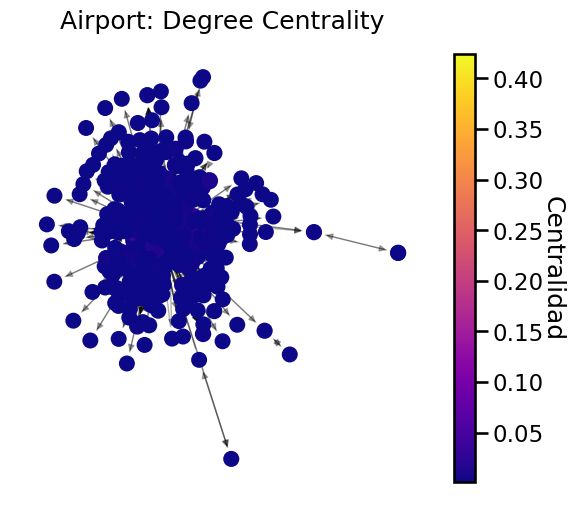

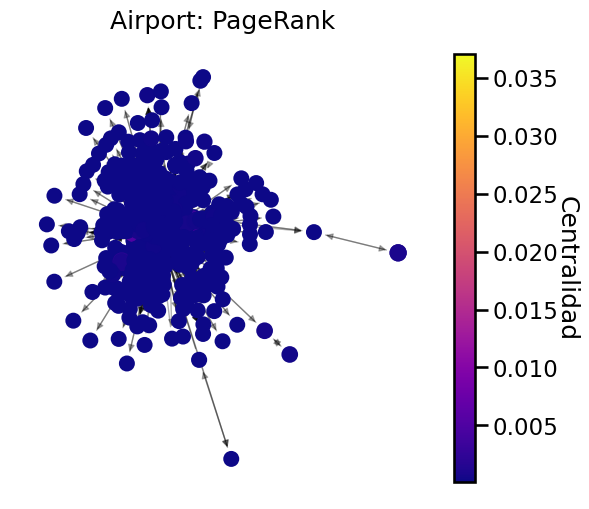

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle

def plot_centrality_with_colorbar(G, pos, centrality, title, cmap=plt.cm.plasma):
    """
    Dibuja G usando 'pos', coloreando y escalando nodos según 'centrality',
    y añade una barra de colores.
    """
    # Preparamos valores normalizados y tamaños
    vals = list(centrality.values())
    norm_vals = [(v - min(vals)) / (max(vals) - min(vals) + 1e-6) for v in vals]
    sizes = [100 + 900 * v for v in norm_vals]

    fig, ax = plt.subplots(figsize=(6,6))
    nodes = nx.draw_networkx_nodes(
        G, pos,
        node_size=sizes,
        node_color=vals,
        cmap=cmap,
        ax=ax
    )
    nx.draw_networkx_edges(G, pos, alpha=0.3, ax=ax)
    ax.set_title(title)
    ax.axis('off')

    # Escala de colores
    sm = plt.cm.ScalarMappable(
        cmap=cmap,
        norm=plt.Normalize(vmin=min(vals), vmax=max(vals))
    )
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Centralidad', rotation=270, labelpad=15)

    plt.show()


# --- 1) Grafo dirigido: Airport (componente fuertemente conexa) ---
G_air = read_dir_graph_weighted('airport.txt')
H_air = obtener_mayor_componente_fuertemente_conexa(G_air)
with open('airportStronglyConn_pos.pkl','rb') as f:
    pos_air = pickle.load(f)

# Calculamos dos medidas de centralidad
deg_air = nx.degree_centrality(H_air)    # grado (in+out)
pr_air  = nx.pagerank(H_air, weight='weight')

# Dibujamos cada una con su colorbar
plot_centrality_with_colorbar(H_air, pos_air, deg_air, 
    "Airport: Degree Centrality")
plot_centrality_with_colorbar(H_air, pos_air, pr_air, 
    "Airport: PageRank")





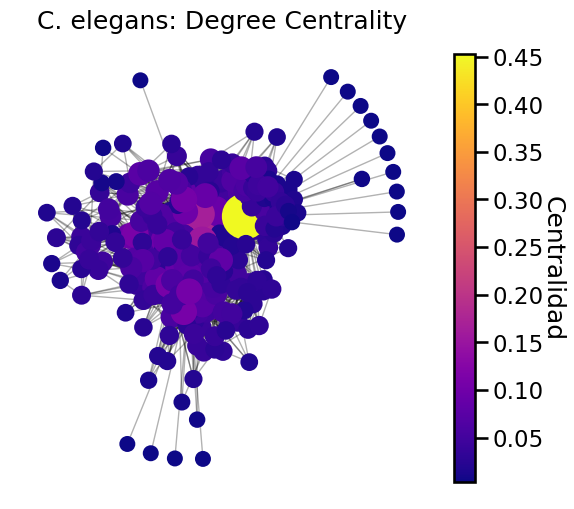

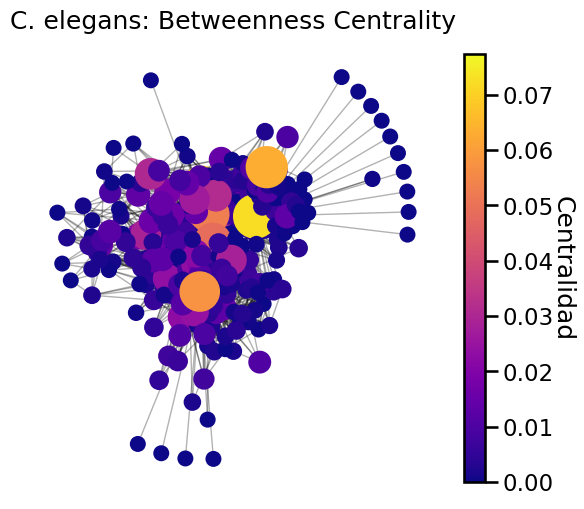

In [19]:
# --- 2) Grafo no dirigido: C. elegans ---
G_ce = read_graph_weighted('celegans.txt')
pos_ce = nx.spring_layout(G_ce, iterations=1000, seed=42)

deg_ce = nx.degree_centrality(G_ce)
btw_ce = nx.betweenness_centrality(G_ce, weight='weight', normalized=True)

plot_centrality_with_colorbar(G_ce, pos_ce, deg_ce, 
    "C. elegans: Degree Centrality")
plot_centrality_with_colorbar(G_ce, pos_ce, btw_ce, 
    "C. elegans: Betweenness Centrality")

In [21]:
!pip install powerlaw

  Obtaining dependency information for powerlaw from https://files.pythonhosted.org/packages/e8/26/e0daa306f83d705bc1ed4d6759b7fc945cc787530c230ee1fe299cc28093/powerlaw-1.5-py3-none-any.whl.metadata


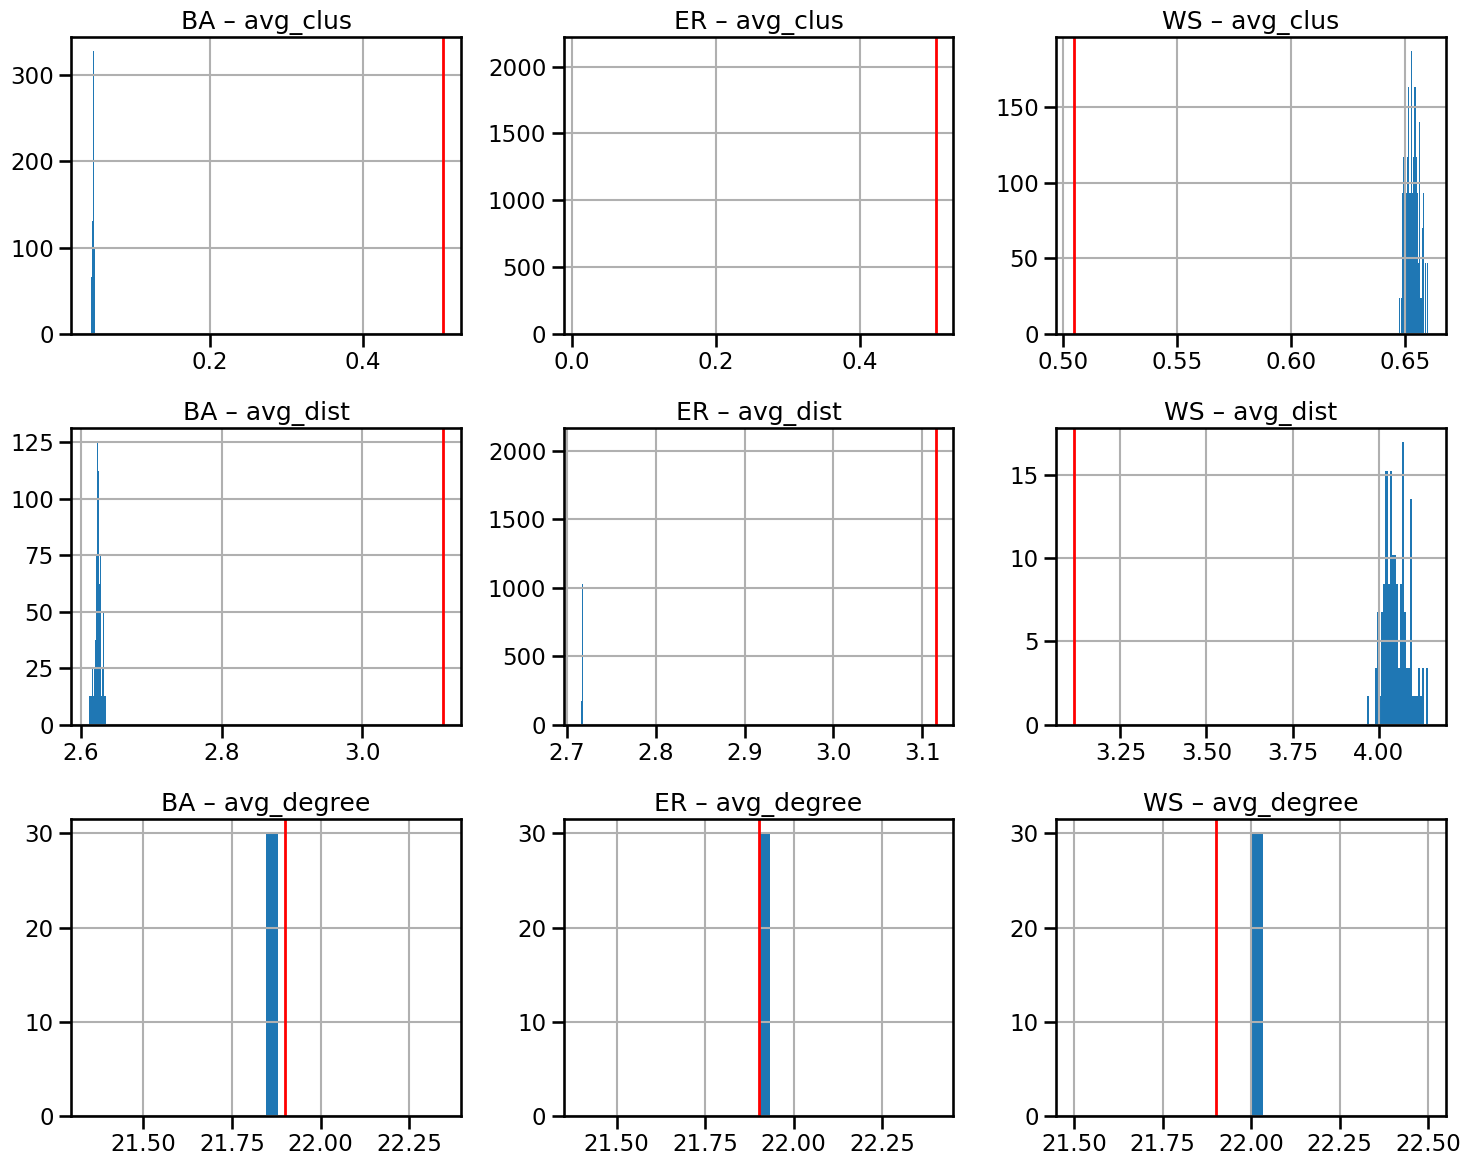

In [22]:
import networkx as nx
import powerlaw
import pandas as pd
import matplotlib.pyplot as plt

# 1) Carga el grafo dirigido y lo convierte a no dirigido para extraer la componente gigante
G_air = read_dir_graph_weighted('airport.txt')
G_air_und = G_air.to_undirected()
comp = max(nx.connected_components(G_air_und), key=len)
Gg_air = G_air_und.subgraph(comp).copy()

# 2) Calcula parámetros observados
n = Gg_air.number_of_nodes()
m = Gg_air.number_of_edges()
grado_medio_obs = 2 * m / n
m0 = int(round(grado_medio_obs / (2 - 1/n)))  # m₀ para BA

# 3) Simulaciones de los tres modelos
repetitions = 100
data = []

for seed in range(repetitions):
    d = {}

    # — Barabasi–Albert —
    G = nx.barabasi_albert_graph(n, m0, seed=seed)
    d['ba_avg_clus']   = nx.average_clustering(G)
    d['ba_avg_dist']   = nx.average_shortest_path_length(G)
    d['ba_avg_degree'] = 2 * G.number_of_edges() / n
    d['ba_alpha']      = powerlaw.Fit(
                            [deg for _, deg in G.degree()],
                            discrete=True,
                            xmin=8
                         ).alpha

    # — Erdos–Rényi —
    G = nx.gnm_random_graph(n, m, seed=seed)
    d['er_avg_clus']   = nx.average_clustering(G)
    d['er_avg_dist']   = nx.average_shortest_path_length(G)
    d['er_avg_degree'] = 2 * G.number_of_edges() / n

    # — Watts–Strogatz —
    k = int(round(grado_medio_obs))
    G = nx.watts_strogatz_graph(n, k, 0.03, seed=seed)
    d['ws_avg_clus']   = nx.average_clustering(G)
    d['ws_avg_dist']   = nx.average_shortest_path_length(G)
    d['ws_avg_degree'] = 2 * G.number_of_edges() / n

    data.append(d)

df = pd.DataFrame(data)

# 4) Valores reales de la componente gigante
valores_reales = {
    'avg_clus':  nx.average_clustering(Gg_air),
    'avg_dist':  nx.average_shortest_path_length(Gg_air),
    'avg_degree': grado_medio_obs
}

# 5) Gráficos 3×3 comparando distribuciones y valor observado
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
indicadores = ['avg_clus', 'avg_dist', 'avg_degree']
modelos     = ['ba', 'er', 'ws']

for i, ind in enumerate(indicadores):
    for j, model in enumerate(modelos):
        ax = axs[i, j]
        col = f'{model}_{ind}'
        df[col].hist(ax=ax, density=True, bins=30)
        ax.axvline(valores_reales[ind], color='r', linewidth=2)
        ax.set_title(f'{model.upper()} – {ind}')

plt.tight_layout()
plt.show()


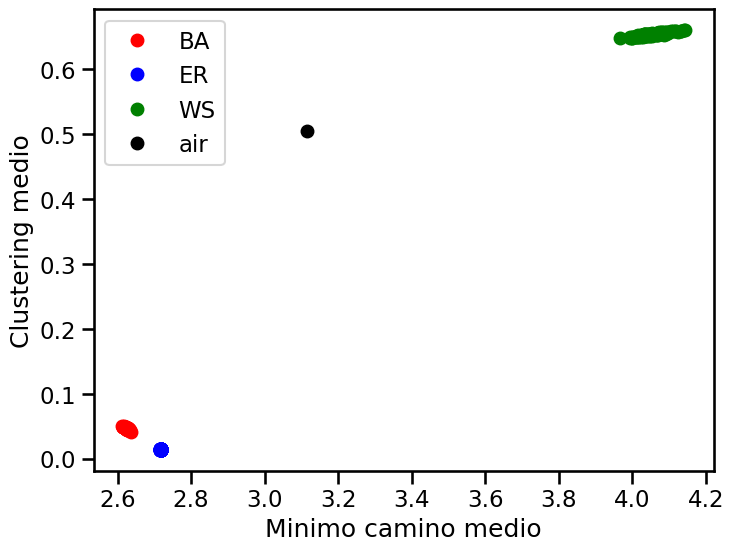

In [27]:
df = pd.DataFrame(data)
plt.plot(df['ba_avg_dist'].values,df['ba_avg_clus'].values,'ro',label='BA')
plt.plot(df['er_avg_dist'].values,df['er_avg_clus'].values,'bo',label='ER')
plt.plot(df['ws_avg_dist'].values,df['ws_avg_clus'].values,'go',label='WS')
plt.plot(nx.average_shortest_path_length(Gg_air),nx.average_clustering(Gg_air),'ko',label='air')

plt.legend()
plt.ylabel('Clustering medio')
plt.xlabel('Minimo camino medio')

plt.show()

C. elegans: n=297, m=2148, ⟨k⟩=14.46, m0=7


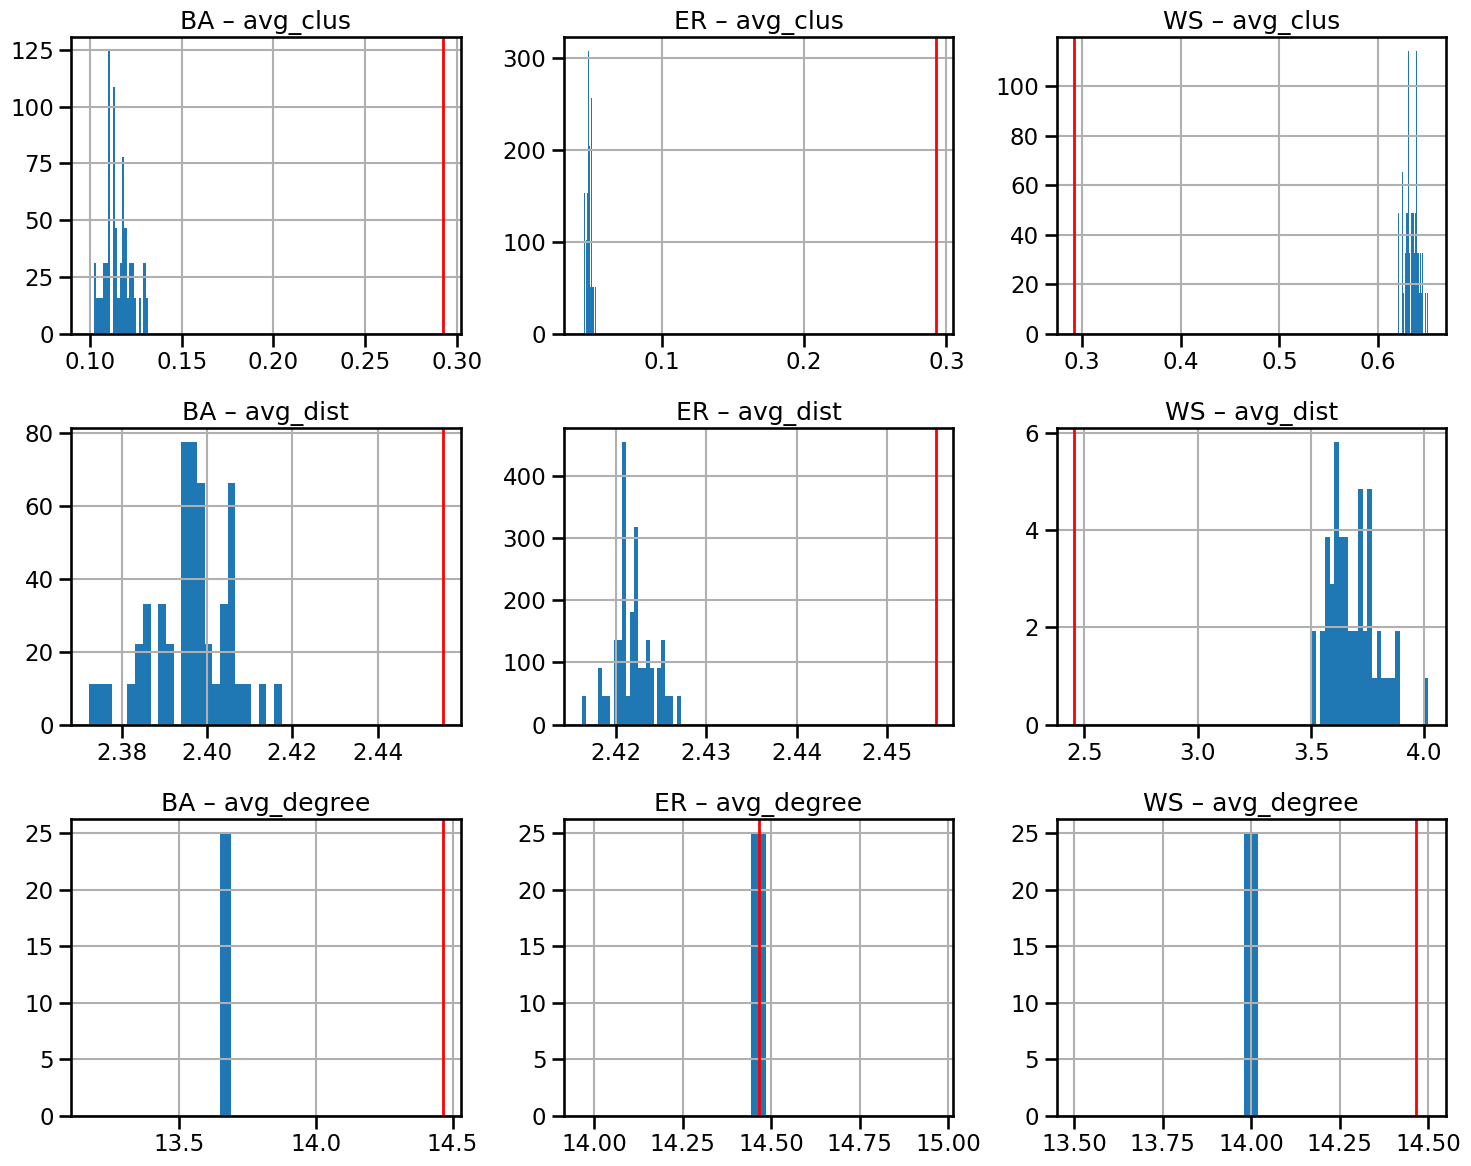

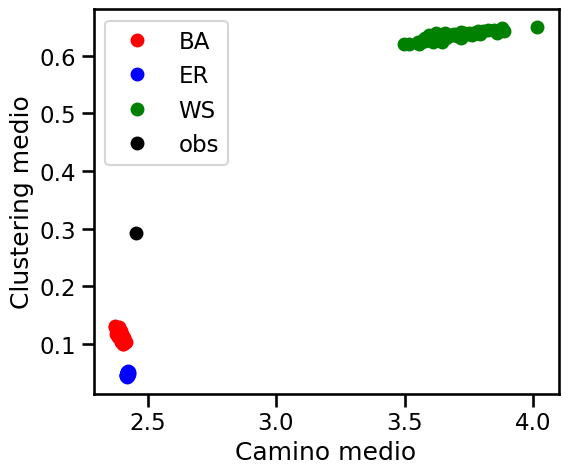

In [29]:
import networkx as nx
import powerlaw
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request



# 2) Carga y componente gigante
G_ce = read_graph_weighted("celegans.txt")
G_ce_und = G_ce.to_undirected()
comp = max(nx.connected_components(G_ce_und), key=len)
Gg_ce = G_ce_und.subgraph(comp).copy()

# 3) Parámetros observados
n = Gg_ce.number_of_nodes()
m = Gg_ce.number_of_edges()
grado_medio_obs = 2 * m / n
m0 = int(round(grado_medio_obs / (2 - 1/n)))  # para BA

print(f"C. elegans: n={n}, m={m}, ⟨k⟩={grado_medio_obs:.2f}, m0={m0}")

# 4) Simulaciones
repetitions = 50   # <–– baja de 100 a 50 para ganar velocidad
data = []

for seed in range(repetitions):
    d = {}
    # — Barabasi–Albert
    G = nx.barabasi_albert_graph(n, m0, seed=seed)
    d['ba_avg_clus']   = nx.average_clustering(G)
    d['ba_avg_dist']   = nx.average_shortest_path_length(G)
    d['ba_avg_degree'] = 2 * G.number_of_edges() / n
    # alpha solo en BA
    degs = [deg for _, deg in G.degree()]
    d['ba_alpha']      = powerlaw.Fit(degs, discrete=True, xmin=2).alpha

    # — Erdos–Rényi
    G = nx.gnm_random_graph(n, m, seed=seed)
    d['er_avg_clus']   = nx.average_clustering(G)
    d['er_avg_dist']   = nx.average_shortest_path_length(G)
    d['er_avg_degree'] = 2 * G.number_of_edges() / n

    # — Watts–Strogatz
    k = int(round(grado_medio_obs))
    G = nx.watts_strogatz_graph(n, k, 0.03, seed=seed)
    d['ws_avg_clus']   = nx.average_clustering(G)
    d['ws_avg_dist']   = nx.average_shortest_path_length(G)
    d['ws_avg_degree'] = 2 * G.number_of_edges() / n

    data.append(d)

df = pd.DataFrame(data)

# 5) Valores reales
valores_reales = {
    'avg_clus':  nx.average_clustering(Gg_ce),
    'avg_dist':  nx.average_shortest_path_length(Gg_ce),
    'avg_degree': grado_medio_obs
}

# 6) Gráficos 3×3
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
indicadores = ['avg_clus', 'avg_dist', 'avg_degree']
modelos     = ['ba', 'er', 'ws']

for i, ind in enumerate(indicadores):
    for j, model in enumerate(modelos):
        ax = axs[i, j]
        col = f'{model}_{ind}'
        df[col].hist(ax=ax, density=True, bins=25)
        ax.axvline(valores_reales[ind], color='r', lw=2)
        ax.set_title(f'{model.upper()} – {ind}')
plt.tight_layout()

# 7) Scatter clustering vs. dist
fig2, ax2 = plt.subplots(figsize=(6, 5))
ax2.plot(df['ba_avg_dist'], df['ba_avg_clus'], 'ro', label='BA')
ax2.plot(df['er_avg_dist'], df['er_avg_clus'], 'bo', label='ER')
ax2.plot(df['ws_avg_dist'], df['ws_avg_clus'], 'go', label='WS')
ax2.plot(valores_reales['avg_dist'], valores_reales['avg_clus'], 'ko', label='obs')
ax2.set_xlabel('Camino medio')
ax2.set_ylabel('Clustering medio')
ax2.legend()
plt.show()


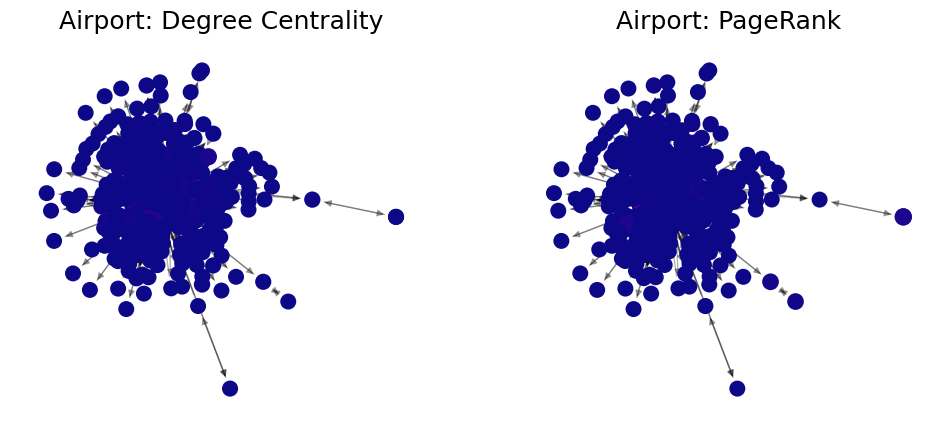

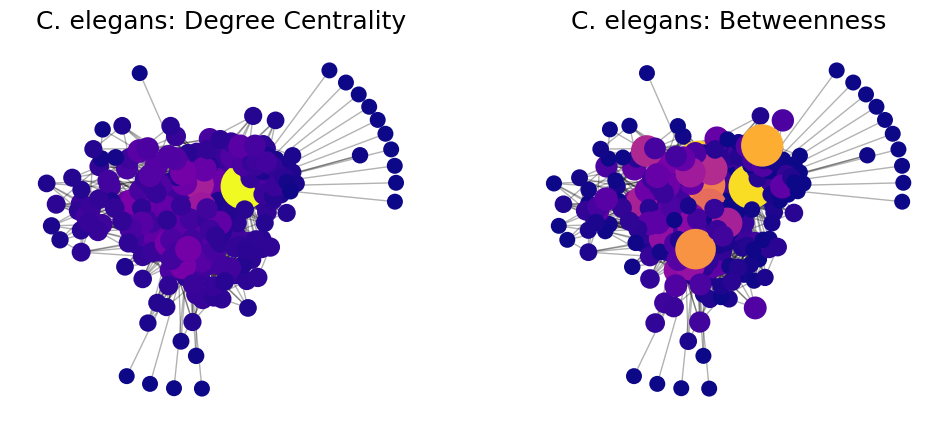

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle

def plot_centrality(G, pos, centrality, title, cmap=plt.cm.plasma):
    """
    Dibuja G usando 'pos', coloreando y escalando nodos según 'centrality'.
    """
    vals = list(centrality.values())
    # normalizar colores entre 0 y 1
    norm = [(v - min(vals)) / (max(vals) - min(vals) + 1e-6) for v in vals]
    # escalas de tamaño (entre 100 y 1000)
    sizes = [100 + 900 * x for x in norm]
    nx.draw_networkx_nodes(G, pos,
                           node_size=sizes,
                           node_color=vals,
                           cmap=cmap)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.title(title)
    plt.axis('off')

# --- 1) Grafo dirigido: Airport (componente fuertemente conexa) ---
G_air = read_dir_graph_weighted('airport.txt')
H_air = obtener_mayor_componente_fuertemente_conexa(G_air)
with open('airportStronglyConn_pos.pkl','rb') as f:
    pos_air = pickle.load(f)

# Centralidades
deg_air = nx.degree_centrality(H_air)    # grado (in+out normalizado)
pr_air  = nx.pagerank(H_air, weight='weight')

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_centrality(H_air, pos_air, deg_air, "Airport: Degree Centrality")
plt.subplot(1,2,2)
plot_centrality(H_air, pos_air, pr_air,  "Airport: PageRank")
plt.show()

# --- 2) Grafo no dirigido: C. elegans ---
G_ce = read_graph_weighted('celegans.txt')
pos_ce = nx.spring_layout(G_ce, iterations=1000, seed=42)

# Centralidades
deg_ce = nx.degree_centrality(G_ce)
btw_ce = nx.betweenness_centrality(G_ce, weight='weight', normalized=True)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_centrality(G_ce, pos_ce, deg_ce, "C. elegans: Degree Centrality")
plt.subplot(1,2,2)
plot_centrality(G_ce, pos_ce, btw_ce, "C. elegans: Betweenness")
plt.show()


In [33]:
import networkx as nx
import pandas as pd

# 1) Carga y extrae componente gigante
G_air = read_dir_graph_weighted('airport.txt')
G_air_und = G_air.to_undirected()
comp = max(nx.connected_components(G_air_und), key=len)

# Grafo para degree-centrality (no dirigido)
Gg_und = G_air_und.subgraph(comp).copy()
# Grafo para pagerank (dirigido, restringido a la misma compon.)
Gg_dir = G_air.subgraph(comp).copy()

# 2) Calcula centralidades
deg_cent = nx.degree_centrality(Gg_und)
pr      = nx.pagerank(Gg_dir, alpha=0.85)

# 3) Monta DataFrame y ordena por degree centrality
df = pd.DataFrame([
    {'airport': n, 
     'degree_centrality': deg_cent[n], 
     'pagerank': pr.get(n, 0)}
    for n in Gg_und.nodes()
])
df = df.sort_values('degree_centrality', ascending=False).reset_index(drop=True)

# 4) Imprime el resultado
print(df.to_string(index=False, float_format='%.4f'))


 airport  degree_centrality  pagerank
      45             0.1999    0.0366
      68             0.1903    0.0105
      87             0.1884    0.0281
     164             0.1859    0.0256
      73             0.1852    0.0225
     146             0.1744    0.0240
     149             0.1738    0.0150
     173             0.1712    0.0161
     158             0.1700    0.0179
     316             0.1661    0.0168
      56             0.1617    0.0229
      59             0.1604    0.0137
     132             0.1560    0.0122
      89             0.1553    0.0125
     163             0.1528    0.0164
      79             0.1470    0.0142
     135             0.1394    0.0033
     195             0.1362    0.0169
      61             0.1343    0.0096
       9             0.1305    0.0043
      50             0.1299    0.0035
      53             0.1292    0.0039
     136             0.1286    0.0087
     105             0.1260    0.0048
      54             0.1248    0.0150
      82    

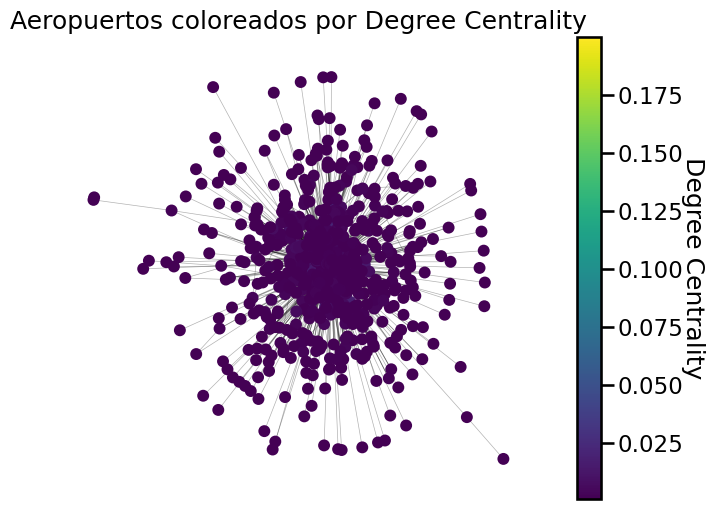

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1) Carga y componente gigante
G_air = read_dir_graph_weighted('airport.txt')
G_air_und = G_air.to_undirected()
comp = max(nx.connected_components(G_air_und), key=len)
Gg = G_air_und.subgraph(comp)

# 2) Calcula centralidades
deg_cent = nx.degree_centrality(Gg)

# 3) Normalización y colormap
values = list(deg_cent.values())
norm   = mpl.colors.Normalize(vmin=min(values), vmax=max(values))
cmap   = plt.cm.viridis
node_colors = [cmap(norm(deg_cent[n])) for n in Gg.nodes()]

# 4) Dibujar en un axes concreto
fig, ax = plt.subplots(figsize=(8, 6))
pos = nx.spring_layout(Gg, seed=42)

nx.draw_networkx_edges(Gg, pos, alpha=0.3, width=0.5, ax=ax)
nx.draw_networkx_nodes(Gg, pos,
                       node_size=50,
                       node_color=node_colors,
                       ax=ax)

# 5) Colorbar ligado a ese mismo ax
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax)      # <— AQUÍ pasamos fig y ax
cbar.set_label("Degree Centrality", rotation=270, labelpad=15)

ax.set_title("Aeropuertos coloreados por Degree Centrality")
ax.axis('off')
plt.show()


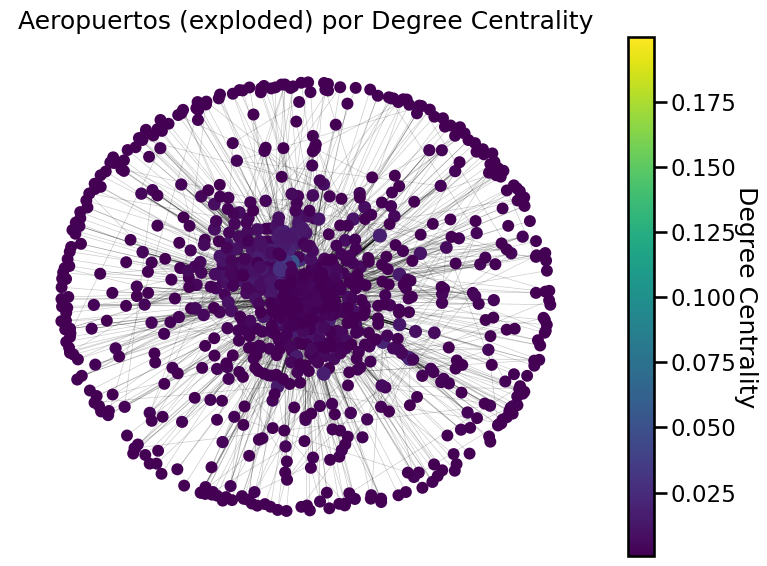

In [57]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

# 1) Carga y componente gigante
G_air = read_dir_graph_weighted('airport.txt')
G_air_und = G_air.to_undirected()
comp = max(nx.connected_components(G_air_und), key=len)
Gg = G_air_und.subgraph(comp).copy()

# 2) Centralidad de grado
deg_cent = nx.degree_centrality(Gg)

# 3) Layout “explosivo”
#   - k más grande → nodos más separados
#   - iterations suficientes para converger
pos = nx.spring_layout(Gg,
                       k=2,          # distancia ideal entre nodos ( > default )
                       iterations=200,
                       seed=42)

# 4) Opcional: reescalar todo el layout para ampliarlo aún más
scale_factor = 3.0
pos = {n: np.array(coord) * scale_factor for n, coord in pos.items()}

# 5) Preparamos colores y tamaños
values     = list(deg_cent.values())
norm       = mpl.colors.Normalize(vmin=min(values), vmax=max(values))
cmap       = plt.cm.viridis
node_colors= [cmap(norm(deg_cent[n])) for n in Gg.nodes()]
node_sizes = [50 + 300 * norm(deg_cent[n]) for n in Gg.nodes()]

# 6) Dibujar
fig, ax = plt.subplots(figsize=(8, 6))
nx.draw_networkx_edges(Gg, pos, alpha=0.2, width=0.5, ax=ax)
nx.draw_networkx_nodes(Gg, pos,
                       node_size=node_sizes,
                       node_color=node_colors,
                       ax=ax)

# 7) Colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Degree Centrality", rotation=270, labelpad=15)

ax.set_title("Aeropuertos (exploded) por Degree Centrality")
ax.axis('off')
plt.tight_layout()
plt.show()


In [31]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

def robustness(G_orig, centrality, directed=False, trials=20):
    """
    Analiza robustez de G_orig eliminando, en cada paso, todos los enlaces
    de un nodo:
      - Aleatorio (promedia `trials` veces sobre órdenes aleatorios).
      - Dirigido (siguiendo `centrality`, de mayor a menor).
    Para cada paso i (nodos desconectados = i), devuelve:
      * NgN_random[i], NgN_targeted[i]
      * si not directed: E_random[i], E_targeted[i]
    """
    N = G_orig.number_of_nodes()
    # Orden dirigido por centralidad (descendente)
    target_order = sorted(centrality, key=centrality.get, reverse=True)
    
    def one_pass(order):
        G = G_orig.copy()
        Ng = []
        Ef = []
        for node in order:
            # remover todos los enlaces incidentes al nodo
            if directed:
                G.remove_edges_from(list(G.in_edges(node)) + list(G.out_edges(node)))
            else:
                G.remove_edges_from(list(G.edges(node)))
            # tamaño comp gigante
            if directed:
                comps = [len(c) for c in nx.weakly_connected_components(G)]
            else:
                comps = [len(c) for c in nx.connected_components(G)]
            Ng.append(max(comps) / N)
            # eficiencia (solo no dirigido)
            if not directed:
                Ef.append(nx.global_efficiency(G))
        return Ng, Ef

    # 1) Targeted
    Ng_t, Ef_t = one_pass(target_order)

    # 2) Random (promedio)
    all_Ng = []
    all_Ef = []
    nodes = list(G_orig.nodes())
    for _ in range(trials):
        order_rand = random.sample(nodes, N)
        Ng_r, Ef_r = one_pass(order_rand)
        all_Ng.append(Ng_r)
        all_Ef.append(Ef_r)
    Ng_r_mean = np.mean(all_Ng, axis=0)
    Ef_r_mean = None if directed else np.mean(all_Ef, axis=0)

    return {
        'fraction': np.arange(1, N+1)/N,
        'NgN_targeted': Ng_t,
        'NgN_random':  Ng_r_mean,
        **({} if directed else {
          'E_targeted': Ef_t,
          'E_random':   Ef_r_mean
        })
    }

def plot_robustness(curves, directed=False, title=''):
    """
    Dibuja Ng/N (y eficiencia si corresponde) versus fracción de nodos removidos.
    """
    x = curves['fraction']
    plt.figure(figsize=(6,4))
    plt.plot(x, curves['NgN_random'],  '--', label='Ng/N random')
    plt.plot(x, curves['NgN_targeted'], '-',  label='Ng/N targeted')
    if not directed:
        plt.plot(x, curves['E_random'],  '--', label='Eff random')
        plt.plot(x, curves['E_targeted'], '-',  label='Eff targeted')
    plt.xlabel('Fracción de nodos desconectados')
    plt.ylabel('Ng/N  /  Eficiencia')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


# === Aplicación a tus dos grafos ===

# — 1) Airport (dirigido) —
# Usamos H_air y su PageRank (pr_air) calculados en el punto c)
#curves_air = robustness(H_air, pr_air, directed=True, trials=30)
#plot_robustness(curves_air, directed=True, title='Robustez Airport (Ng/N)')


# — 2) C. elegans (no dirigido) —
# Usamos G_ce y su betweenness (btw_ce)
#curves_ce = robustness(G_ce, btw_ce, directed=False, trials=30)
#plot_robustness(curves_ce, directed=False, title='Robustez C. elegans (Ng/N & E)')


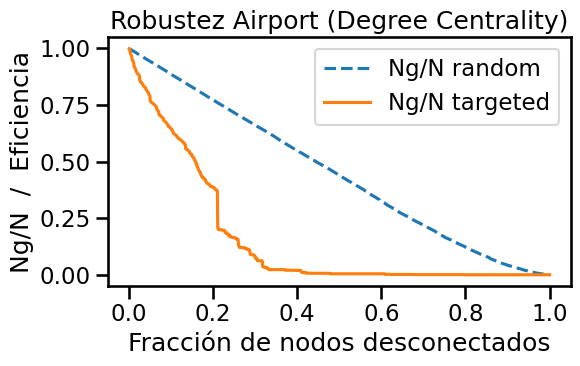

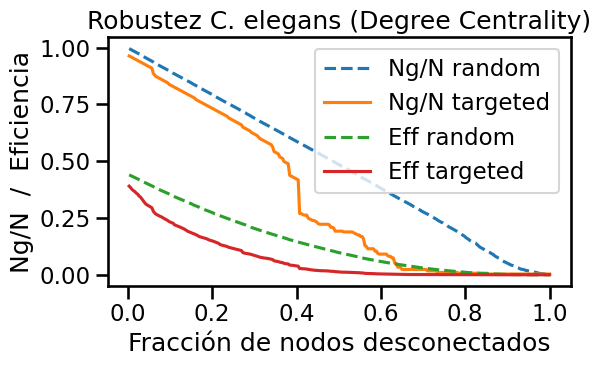

In [32]:
# --- Supuestos previos ---
# H_air = componente fuertemente conexa de Airport (DiGraph)
# G_ce  = grafo no dirigido de C. elegans

import networkx as nx

# 1) Calculamos la centralidad de grado en ambos
deg_air = nx.degree_centrality(H_air)
deg_ce  = nx.degree_centrality(G_ce)

# 2) Ejecutamos el análisis de robustez usando degree centrality
curves_air = robustness(H_air, deg_air, directed=True,  trials=30)
curves_ce  = robustness(G_ce,  deg_ce,  directed=False, trials=30)

# 3) Dibujamos las curvas
plot_robustness(curves_air, directed=True,  title='Robustez Airport (Degree Centrality)')
plot_robustness(curves_ce,  directed=False, title='Robustez C. elegans (Degree Centrality)')


In [37]:
!pip install community

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for community: filename=community-1.0.0b1-py3-none-any.whl size=2143 sha256=e0dc5cd35857ec721a60b7ccc83c2887a2eab4ddb521fce57ef5df45f25dc6de
  Stored in directory: c:\users\benja\appdata\local\pip\cache\wheels\b7\c9\3f\e222b011e31d3d1de1fd799caed228f770d56f66563014285d
Successfully built community


Modularidad Louvain (C. elegans): 0.4953


     ---------------------------------------- 0.0/204.6 kB ? eta -:--:--
     -------------------------------------- 204.6/204.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9403 sha256=d23074f1904cb2fdd73b06f9e201fa1d4d382d1d4f0fa5ad226d81a74f16b35c
  Stored in directory: c:\users\benja\appdata\local\pip\cache\wheels\11\c1\e7\f62a211c636275e2da798bf0c307a3ae79aeddaf2524a03ce4
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


Modularidad Louvain-NX (C. elegans): 0.4943
Modularidad Louvain (C.elegans): 0.4901


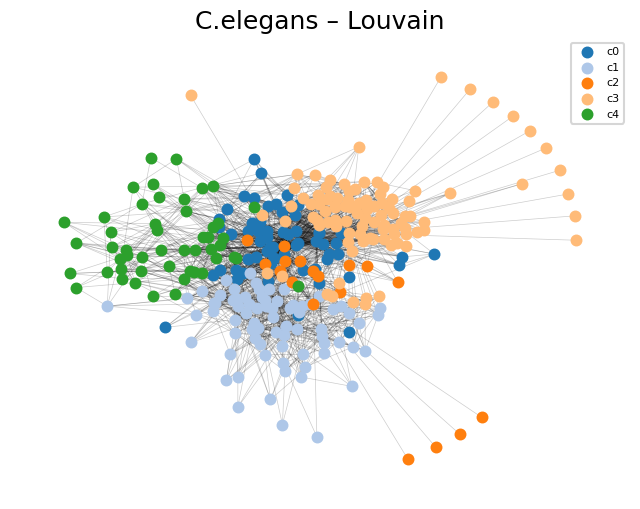

Girvan-Newman 2 comunidades → tamaños: [296, 1]


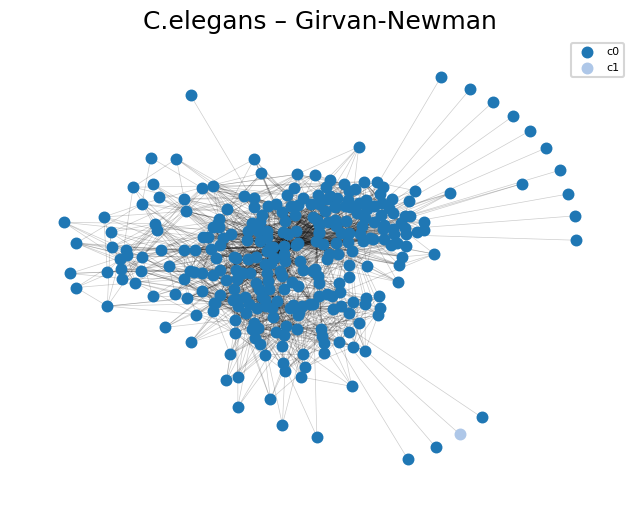

Modularidad Louvain (unweighted): 0.3295


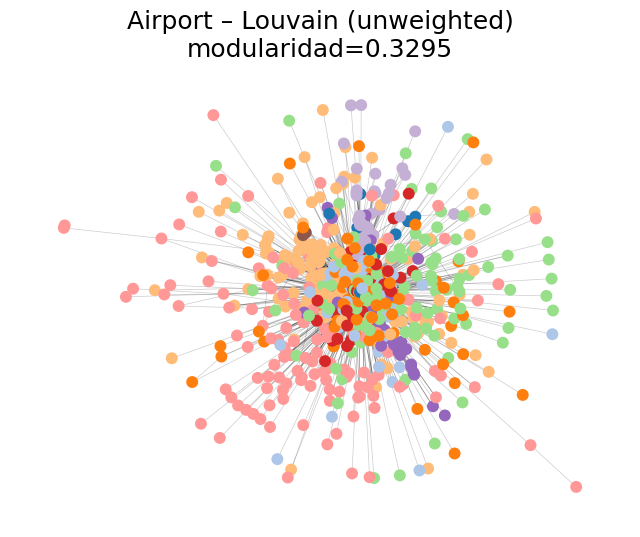

In [51]:
# 0) Instala dependencia para Louvain
# pip install python-louvain

import networkx as nx
import community as community_louvain   # python-louvain
import matplotlib.pyplot as plt

from networkx.algorithms.community import louvain_communities
from networkx.algorithms.community.quality import modularity

def detectar_comunidades_louvain_nx(G):
    coms = louvain_communities(G, weight='weight')
    mod  = modularity(G, coms, weight='weight')
    # convertir lista de sets a dict nodo→comunidad
    partition = {n:i for i, comm in enumerate(coms) for n in comm}
    return partition, mod

part_ce2, mod_ce2 = detectar_comunidades_louvain_nx(G_ce)
print(f"Modularidad Louvain-NX (C. elegans): {mod_ce2:.4f}")


def detectar_comunidades_girvan_newman(G, k=None):
    """
    k = número deseado de comunidades finales.
    Si k=None toma la primera división (2 comunidades).
    """
    comp_gen = nx.community.girvan_newman(G)
    if k is None:
        first_level = next(comp_gen)
        return list(first_level)
    else:
        for communities in comp_gen:
            if len(communities) >= k:
                return list(communities)
    return None

def dibujar_comunidades(G, partition, pos=None, title=""):
    """
    partition: dict nodo→comunidad
    pos: posiciones (si ya las cargaste con pickle, úsalas)
    """
    if pos is None:
        pos = nx.spring_layout(G, seed=42)
    # agrupar nodos por comunidad
    comm2nodes = {}
    for n, comm in partition.items():
        comm2nodes.setdefault(comm, []).append(n)
    # paleta
    cmap = plt.cm.tab20 
    plt.figure(figsize=(8,6))
    for comm, nodes in comm2nodes.items():
        nx.draw_networkx_nodes(
            G, pos,
            nodelist=nodes,
            node_size=50,
            node_color=[cmap(comm % 20)],
            label=f"c{comm}"
        )
    nx.draw_networkx_edges(G, pos, alpha=0.2, width=0.5)
    plt.title(title)
    plt.legend(scatterpoints=1, fontsize=8)
    plt.axis('off')
    plt.show()

# ————————————————
# Ejemplo sobre C. elegans
G_ce = read_graph_weighted("celegans.txt").to_undirected()
# 1) Louvain
part_ce, mod_ce = detectar_comunidades_louvain_nx(G_ce)
print(f"Modularidad Louvain (C.elegans): {mod_ce:.4f}")
dibujar_comunidades(G_ce, part_ce, title="C.elegans – Louvain")

# 2) Girvan–Newman (2 comunidades)
coms_gn = detectar_comunidades_girvan_newman(G_ce, k=2)
print(f"Girvan-Newman 2 comunidades → tamaños: {[len(c) for c in coms_gn]}")
# para dibujar, convertimos la lista de sets a dict nodo→índice
part_gn = {n: i for i, comm in enumerate(coms_gn) for n in comm}
dibujar_comunidades(G_ce, part_gn, title="C.elegans – Girvan-Newman")

# ————————————————
# Ejemplo sobre Airport
#G_air = read_dir_graph_weighted("airport.txt").to_undirected()
#part_air, mod_air = detectar_comunidades_louvain_nx(G_air)
#print(f"Modularidad Louvain (Airport): {mod_air:.4f}")

# grafo no dirigido de la componente gigante
# 1) Carga y componente gigante (no dirigido)
G_air = read_dir_graph_weighted('airport.txt').to_undirected()
comp   = max(nx.connected_components(G_air), key=len)
Gg     = G_air.subgraph(comp).copy()

# 2) Detección de comunidades con Louvain de NX (unweighted)
#    weight=None fuerza que ignore cualquier atributo 'weight'
communities = louvain_communities(Gg, weight=None)
mod_score  = modularity(Gg, communities, weight=None)

print(f"Modularidad Louvain Airport (unweighted): {mod_score:.4f}")

# 3) Preparamos un dict nodo→comunidad para colorear
partition = {n:i for i, comm in enumerate(communities) for n in comm}

# 4) Dibujado
pos   = nx.spring_layout(Gg, seed=42)
cmap  = plt.cm.tab20
colors= [cmap(partition[n] % 20) for n in Gg.nodes()]

plt.figure(figsize=(8,6))
nx.draw_networkx_edges(Gg, pos, alpha=0.2, width=0.5)
nx.draw_networkx_nodes(Gg, pos,
                       node_size=50,
                       node_color=colors)
plt.title(f"Airport – Louvain (unweighted)\nmodularidad={mod_score:.4f}")
plt.axis('off')
plt.show()


# Girvan–Newman en Airport puede ser muy lento por tamaño; pruebes sobre muestra:
# subG = G_air.subgraph(list(G_air.nodes())[:200])
# … aplicar mismo flujo sobre subG …


Modularidad Louvain (weighted): 4.3635


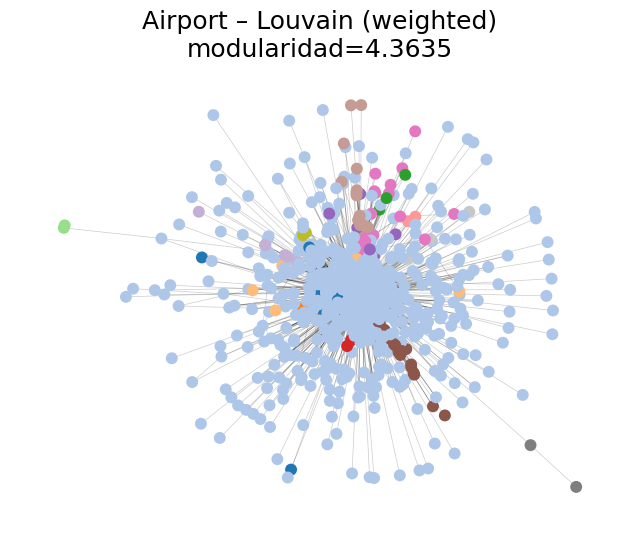

In [53]:
# grafo no dirigido de la componente gigante
# 1) Carga y componente gigante (no dirigido)
G_air = read_dir_graph_weighted('airport.txt').to_undirected()
comp   = max(nx.connected_components(G_air), key=len)
Gg     = G_air.subgraph(comp).copy()

# 2) Detección de comunidades con Louvain de NX (unweighted)
#    weight=None fuerza que ignore cualquier atributo 'weight'
communities = louvain_communities(Gg, weight='weight')
mod_score  = modularity(Gg, communities, weight='weight')

print(f"Modularidad Louvain (weighted): {mod_score:.4f}")

# 3) Preparamos un dict nodo→comunidad para colorear
partition = {n:i for i, comm in enumerate(communities) for n in comm}

# 4) Dibujado
pos   = nx.spring_layout(Gg, seed=42)
cmap  = plt.cm.tab20
colors= [cmap(partition[n] % 20) for n in Gg.nodes()]

plt.figure(figsize=(8,6))
nx.draw_networkx_edges(Gg, pos, alpha=0.2, width=0.5)
nx.draw_networkx_nodes(Gg, pos,
                       node_size=50,
                       node_color=colors)
plt.title(f"Airport – Louvain (weighted)\nmodularidad={mod_score:.4f}")
plt.axis('off')
plt.show()
